In [1]:
import sys
import os
sys.path.append(os.path.join(os.curdir, os.pardir, os.pardir))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from data.mnist import read_data
from net.Model import Model
from common.layer import Dense, Relu, Sigmoid, SoftmaxWithLoss
from optimizer.GradientDescent import GradientDescent

In [3]:
model = Model()
model.add(Dense(784, 50))
model.add(Relu())
model.add(Dense(50, 10))
model.build(SoftmaxWithLoss(), optimizer=GradientDescent(learning_rate=0.1))

print(model.network.layers)
print(model.network.layers_cnt)

OrderedDict([('Dense_1', <common.layer.Dense object at 0x104c9b470>), ('Relu_1', <common.layer.Relu object at 0x104c9b550>), ('Dense_2', <common.layer.Dense object at 0x104c9b5c0>)])
{'Dense': 2, 'Relu': 1}


In [4]:
data_set = read_data(base_dir='../../mnist_data', one_hot=True)

reading ../../mnist_data/train-images-idx3-ubyte.gz
reading ../../mnist_data/t10k-images-idx3-ubyte.gz
reading ../../mnist_data/train-labels-idx1-ubyte.gz
reading ../../mnist_data/t10k-labels-idx1-ubyte.gz


In [5]:
data_set.train.images.shape

(55000, 784)

In [6]:
model.fit(data_set.train.images, data_set.train.labels, 
          batch_size=100, epochs=20, 
          validation_data=(data_set.validation.images, data_set.validation.labels))

Epoch 1/20
train_loss = 0.3577, train_acc = 0.8991, val_loss = 0.3417, val_acc = 0.9046
Epoch 2/20
train_loss = 0.2786, train_acc = 0.9204, val_loss = 0.2656, val_acc = 0.9256
Epoch 3/20
train_loss = 0.2430, train_acc = 0.9298, val_loss = 0.2314, val_acc = 0.9334
Epoch 4/20
train_loss = 0.2116, train_acc = 0.9397, val_loss = 0.2033, val_acc = 0.9430
Epoch 5/20
train_loss = 0.1924, train_acc = 0.9451, val_loss = 0.1859, val_acc = 0.9500
Epoch 6/20
train_loss = 0.1670, train_acc = 0.9523, val_loss = 0.1653, val_acc = 0.9546
Epoch 7/20
train_loss = 0.1551, train_acc = 0.9549, val_loss = 0.1538, val_acc = 0.9568
Epoch 8/20
train_loss = 0.1384, train_acc = 0.9605, val_loss = 0.1423, val_acc = 0.9604
Epoch 9/20
train_loss = 0.1290, train_acc = 0.9629, val_loss = 0.1357, val_acc = 0.9616
Epoch 10/20
train_loss = 0.1203, train_acc = 0.9657, val_loss = 0.1281, val_acc = 0.9630
Epoch 11/20
train_loss = 0.1108, train_acc = 0.9690, val_loss = 0.1213, val_acc = 0.9642
Epoch 12/20
train_loss = 0.103

In [7]:
model.network.evaluate(data_set.test.images, data_set.test.labels)

(0.10742604343316868, 0.9672)

In [8]:
model.save('./params.pkl')

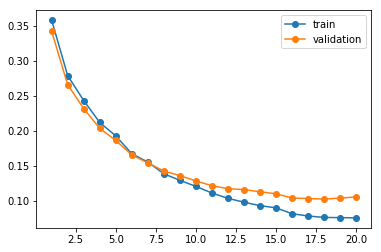

In [9]:
model.plot_history(metric='loss')

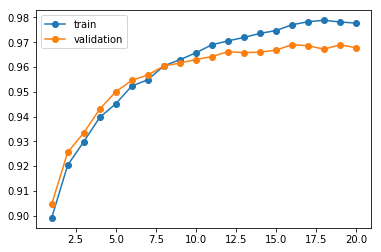

In [10]:
model.plot_history(metric='accuracy')